# Tímadæmi 5 – Lausnir

Hér eru valin dæmi úr 1. kafla í Stanford-kennslubókinni ásamt viðbótum fyrir Python. Leysið dæmin úr bókinni með blaði og blýanti, en viðbæturnar í Júpíter. Þið þurfið að sýna dæmakennaranum ykkar lausnirnar bæði á blaðinu og skjánum til að fá mætingu.

In [5]:
#BYRJA -- Keyrið til að frumstilla numpy o.fl.
import numpy as np
import numpy.random as npr
import numpy.linalg as la
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
%matplotlib inline
# disp(x,y...) skrifar x,y... með 3 aukastöfum
def disp(*args): print(*(f'{a:.3f}' if isinstance(a,float) else a for a in args))
np.set_printoptions(precision=3, floatmode='fixed', suppress=True)

In [6]:
def arrow(x,y,dx,dy):
    """Teiknar ör með örvaroddi frá (x,y) til (x+dx, y+dy)"""
    plt.annotate('', (x+dx,y+dy), (x,y), arrowprops = {'width':0.5, 'headwidth':6, 'fc':'k'})

Í þessum dæmatíma höldum við áfram að æfa okkur bæði í vigrum og Python.

## T6.1 Norm og innfeldi
Lengd eða *norm* tvívíðs vigurs $x = (x_1, x_2)$ er táknuð með $\Vert x\Vert$ (sbr. ritháttinn $|x|$ fyrir tölugildi x). Skv. Pýþagórasarreglu gildir:

$$
\Vert x\Vert = \sqrt{x_1^2 + x_2^2}
$$

og fyrir almennan vigur $x = (x_1, x_2, ..., x_n)$ er lengdin skilgreind með

$$
\Vert x\Vert = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}
$$

Numpy hefur fall til að reikna norm í undirpakkanum `numpy.linalg`. Hann er fluttur inn sem `la` í byrjunarreitnum að ofan, og eftir það má reikna norm x með `la.norm(x)`.

**a)** Teiknið vigurinn $(3,4)$ í hnitakerfi á blað og reiknið lengd hans með reglunni að ofan.<br>
**b)** Sannið regluna fyrir almennan tvívíðan vigur. Vandið ykkur og fáið leiðsögn hjá dæmakennara um hvernig svona sönnun ætti að vera.<br>
**c)** Sannið regluna (rúmfræðilega) fyrir þrívíðan vigur. Það þarf að teikna þrívíða mynd (fáið hjálp hjá kennara) og nota Pýþagóras tvisvar<br>
**d)** Sannið að innfeldi $x$ með sjálfum sér sé jafnt lengd hans í öðru veldi: $x^Tx = \Vert x\Vert^2$<br>
**e)** Látið $x = (3,4)$ og reiknið lengd $x$ í Numpy, bæði með `norm` og með innfeldi<br>
**f)** Notið að lokum fallið `ör` sem gefið er hér að ofan til að teikna vigursamlagninguna $(3,4) = (0,4) + (3,0)$

In [7]:
#6.1e
x = np.array([3,4])
print(np.linalg.norm(x))
print(x@x)

5.0
25


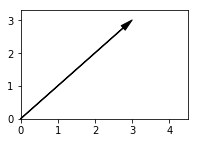

In [8]:
#6.1f
from matplotlib.patches import FancyArrowPatch
plt.figure(figsize=(3,2))
plt.axis([0,4.5,0,3.3])
arrow(0,0,3,3)

## T6.2 Trapisuregla til að reikna heildi
Markmið þessa verkefnis er að rifja aðeins upp heildun, fá á sama tíma æfingu í Python og Numpy og vigrum, m.a. að nota fallbreytur. Til að rifja upp heildun gæti hentað að skoða Stærðfræðigreiningu 1 í [edbook.hi.is](http://edbook.hi.is) eða finna [sæmilegt YouTube myndskeið](https://www.youtube.com/watch?v=9bJ2Z1jbIAE) (ég skoðaði stuttlega nokkur og leist nokkuð vel á það). Hér er ætlunin að reikna heildi með trapisureglu. Byrjið á að lesa [um hana á Wikipediu](https://en.wikipedia.org/wiki/Trapezoidal_rule). Þar að ef heilda skal fall $f$ yfir bil $[a, b]$ er reglan:

$$
\int_{a}^{b} f(x) \, dx \approx \frac{\Delta x}{2}\left(f(x_0) + 2f(x_1)+2f(x_2)+ 2f(x_3)+2f(x_4)+\cdots+2f(x_{n-1}) + f(x_n)\right)
$$

þar sem $x_0$ og $x_n$ eru endapunktar bilsins, $x_0 = a$ og $x_n = b$, og hinir punktarnir, $x_1, x_2, \ldots, x_{n-1}$ dreifast jafnt á bilið með millibili $\Delta x$. Með öðrum orðum:

$$
\begin{align}
\Delta x &= \frac{b - a}{n}\\
x_i &= a + i\Delta x, i = 0, 1,\ldots, n
\end{align}
$$

Þá kemur verkefnið:

**a)** Skrifið Python-fall `trapisa(f, a, b, n)` sem reiknar heildið af `f` milli `a` og `b` með trapisureglu og `n` hlutbilum.<br> 
**b)** Notið `trapisa` til að nálga eftirfarandi heildi fyrir ýmis gildi á `n`:

$$
f(x) = \int_{1}^{3} x(4 - x) \, dx
$$

**Leiðbeiningar** Til að búa til vigurinn `x` liggur beint við að nota `np.linspace`. Við tökum eftir að inni í svigunum í reglunni að ofan er innfeldi vigranna $[1,2,2,\ldots,2,1]$ og $[f(x_0),\ldots,f(x_n)]$. Fyrri vigurinn er auðvelt að búa til með aðstoð `np.ones` og þann seinni má reikna einfaldlega með `fx = f(x)`.

In [9]:
def trapisa(f, a, b, n):
    for i in range(a,b):
        x += (b-a)/n
        return x
f = x*(4-x)

In [11]:
def f(x):
    return x*(4-x)

def trap(f,a,b,n):
    dx = (b-a)/n
    c = 2*np.ones(n+1)
    print(c)
    c[0] = c[n] = 1
    print(c)
    x = np.linspace(a,b,n+1)
    F = f(x)
    H = (c @ F)*dx/2
    return H
    
H = trap(f,1,3,10)
print(H)

[2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.000]
[1.000 2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.000 2.000 1.000]
7.32
